In [2]:
# imports:
%pylab inline
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('uber-raw-data-apr14.txt')

## Understanding the dataset

In [4]:
df.head(10) # shows first 5 elements

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
5,4/1/2014 0:33:00,40.7383,-74.0403,B02512
6,4/1/2014 0:39:00,40.7223,-73.9887,B02512
7,4/1/2014 0:45:00,40.7620,-73.9790,B02512
8,4/1/2014 0:55:00,40.7524,-73.9960,B02512
9,4/1/2014 1:01:00,40.7575,-73.9846,B02512


In [5]:
df.index # da l index msh l column/ categories

RangeIndex(start=0, stop=564516, step=1)

In [6]:
df.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [7]:
df.describe()  # giving a brief statistical description of the data

,Lat,Lon
count,564516.000000,564516.000000
mean,40.740005,-73.976817
std,0.036083,0.050426
min,40.072900,-74.773300
25%,40.722500,-73.997700
50%,40.742500,-73.984800
75%,40.760700,-73.970000
max,42.116600,-72.066600


## manipulating our data set

In [8]:
df['Date/Time'] = list(map(pd.to_datetime,df['Date/Time']))

In [9]:
# just trying to insert a new column ;)
df['Date'] = [ i.date() for i in df['Date/Time']]
df['Time'] = [ i.time() for i in df['Date/Time']]
df['Hour'] = [ i.time().hour for i in df['Date/Time']]

## analyzing time to find the rush hours

In [10]:
df.head()

,Date/Time,Lat,Lon,Base,Date,Time,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,00:11:00,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,00:17:00,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,00:21:00,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,00:28:00,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,00:33:00,0


In [11]:
df['Hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: Hour, dtype: int64

<AxesSubplot:xlabel='Hour'>

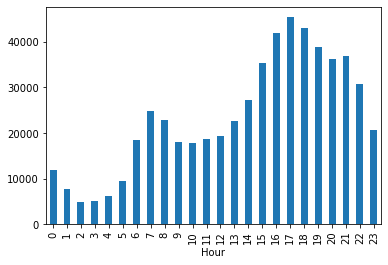

In [12]:
Hour_count = df.groupby('Hour').size()
#plt.plot(list(range(0,24,1)), Hour_count)
plt.figure()
Hour_count.plot(kind = 'bar')
# multiple maximums: at 7 am and 17 = 5 pm

<AxesSubplot:>

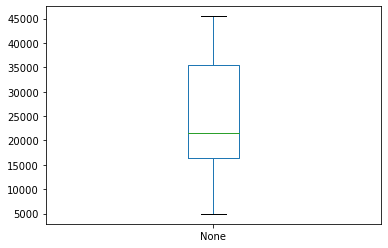

In [13]:
Hour_count.plot(kind = 'box')

In [14]:
print(Hour_count)

Hour
0     11910
1      7769
2      4935
3      5040
4      6095
5      9476
6     18498
7     24924
8     22843
9     17939
10    17865
11    18774
12    19425
13    22603
14    27190
15    35324
16    42003
17    45475
18    43003
19    38923
20    36244
21    36964
22    30645
23    20649
dtype: int64
